In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Logistic Regression-payment_fraud.csv')

In [3]:
df

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0
...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,0
39217,1647,1,4.876771,creditcard,377.930556,0
39218,1591,1,4.742303,creditcard,0.000000,0
39219,237,1,4.921318,creditcard,236.082639,0


In [48]:
df.head(7)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0
5,119,1,4.962055,paypal,0.000000,0
6,2000,1,4.921349,paypal,0.000000,0


In [49]:
df.shape

(39221, 6)

In [50]:
df.info

<bound method DataFrame.info of        accountAgeDays  numItems  localTime paymentMethod  \
0                  29         1   4.745402        paypal   
1                 725         1   4.742303   storecredit   
2                 845         1   4.921318    creditcard   
3                 503         1   4.886641    creditcard   
4                2000         1   5.040929    creditcard   
...               ...       ...        ...           ...   
39216             986         1   4.836982    creditcard   
39217            1647         1   4.876771    creditcard   
39218            1591         1   4.742303    creditcard   
39219             237         1   4.921318    creditcard   
39220             272         1   5.040929        paypal   

       paymentMethodAgeDays  label  
0                 28.204861      0  
1                  0.000000      0  
2                  0.000000      0  
3                  0.000000      0  
4                  0.000000      0  
...                     .

In [51]:
df.isna().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

In [52]:
df.dropna(inplace=True)

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
label_encoder=LabelEncoder()

In [55]:
df['paymentMethod_encoded']=label_encoder.fit_transform(df['paymentMethod'])

In [56]:
df

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label,paymentMethod_encoded
0,29,1,4.745402,paypal,28.204861,0,1
1,725,1,4.742303,storecredit,0.000000,0,2
2,845,1,4.921318,creditcard,0.000000,0,0
3,503,1,4.886641,creditcard,0.000000,0,0
4,2000,1,5.040929,creditcard,0.000000,0,0
...,...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,0,0
39217,1647,1,4.876771,creditcard,377.930556,0,0
39218,1591,1,4.742303,creditcard,0.000000,0,0
39219,237,1,4.921318,creditcard,236.082639,0,0


In [57]:
df=df.drop(['paymentMethod'],axis=1)


In [58]:
df

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod_encoded
0,29,1,4.745402,28.204861,0,1
1,725,1,4.742303,0.000000,0,2
2,845,1,4.921318,0.000000,0,0
3,503,1,4.886641,0.000000,0,0
4,2000,1,5.040929,0.000000,0,0
...,...,...,...,...,...,...
39216,986,1,4.836982,0.000000,0,0
39217,1647,1,4.876771,377.930556,0,0
39218,1591,1,4.742303,0.000000,0,0
39219,237,1,4.921318,236.082639,0,0


In [59]:
X=df[['accountAgeDays','numItems','localTime','paymentMethodAgeDays','paymentMethod_encoded']]
X

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_encoded
0,29,1,4.745402,28.204861,1
1,725,1,4.742303,0.000000,2
2,845,1,4.921318,0.000000,0
3,503,1,4.886641,0.000000,0
4,2000,1,5.040929,0.000000,0
...,...,...,...,...,...
39216,986,1,4.836982,0.000000,0
39217,1647,1,4.876771,377.930556,0
39218,1591,1,4.742303,0.000000,0
39219,237,1,4.921318,236.082639,0


In [60]:
Y=df['label']
Y

0        0
1        0
2        0
3        0
4        0
        ..
39216    0
39217    0
39218    0
39219    0
39220    0
Name: label, Length: 39221, dtype: int64

In [61]:
import matplotlib.pyplot as plt


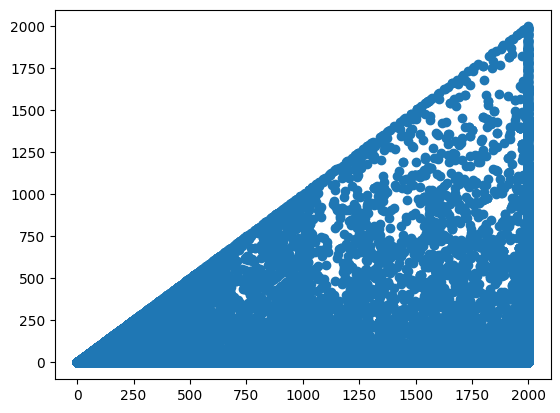

In [62]:
plt.scatter(df.accountAgeDays,df.paymentMethodAgeDays)


In [63]:
from sklearn.model_selection import train_test_split


In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=.8,random_state=42)

In [65]:
X_train.shape

(31376, 5)

In [66]:
Y_train.shape

(31376,)

In [67]:
X_test.shape

(7845, 5)

In [68]:
X_test.shape

(7845, 5)

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc= StandardScaler()

In [71]:
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [72]:
X_train[:3],Y_train[:3]

(array([[ 1.41869001, -0.15157496,  0.55793725, -0.43181907, -0.58916427],
        [ 1.28079817, -0.15157496,  0.22876204, -0.43181907, -0.58916427],
        [ 0.87830308, -0.15157496,  0.44512363,  2.75507451, -0.58916427]]),
 3406     0
 32548    0
 7567     0
 Name: label, dtype: int64)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
logistic_model = LogisticRegression()


In [75]:
logistic_model.fit(X_train, Y_train)

LogisticRegression()

In [76]:
logistic_model.score(X_train,Y_train)*100

98.5721570627231

In [77]:
logistic_model.score(X_test,Y_test)*100

98.49585723390695

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [79]:
y_pred = logistic_model.predict(X_test)

In [80]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9849585723390695


In [81]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9849585723390695


In [82]:
cm = confusion_matrix(Y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[7727    0]
 [ 118    0]]


In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [84]:
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

Precision: 0.0


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [85]:
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

Recall: 0.0


In [86]:
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.0


In [87]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 0.015041427660930529
Root Mean Squared Error: 0.12264349824157222
R^2 Score: -0.015271127216254676
